In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import numpy as np
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate

import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

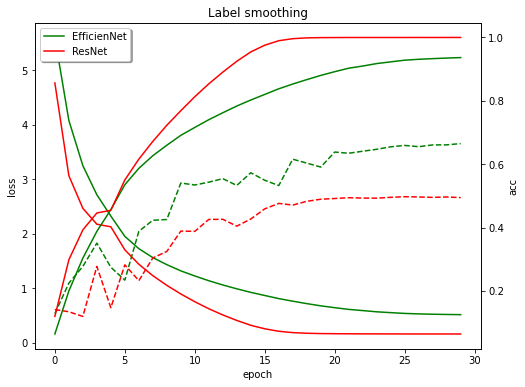

In [2]:
# resnet
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(8,6))
plt.title("Label smoothing")
plt.xlabel('epoch')

one = '1008'
two = '1014'
# three = '1009'
# four = "1016"
l_one = 'EfficienNet'
l_two = 'ResNet'
# l_three = '0.2'
# l_four = '0.05'

acc_one = pd.read_csv(f'accuracy/{one}.csv')
acc_two = pd.read_csv(f'accuracy/{two}.csv')
# acc_three = pd.read_csv(f'accuracy/{three}.csv')
# acc_four = pd.read_csv(f'accuracy/{four}.csv')

ax2 = ax.twinx()
ax.plot(acc_one['loss'], 'g-', label = l_one)
ax2.plot(acc_one['acc'], 'g-')
ax2.plot(acc_one['val_acc'], 'g', linestyle='dashed')

ax.plot(acc_two['loss'], 'r-', label = l_two)
ax2.plot(acc_two['acc'], 'r-')
ax2.plot(acc_two['val_acc'], 'r',linestyle='dashed')

# ax.plot(acc_three['loss'], 'b-', label = l_three)
# ax2.plot(acc_three['acc'], 'b-')
# ax2.plot(acc_three['val_acc'], 'b',  linestyle='dashed')
#
# ax.plot(acc_four['loss'], 'y-', label = l_four)
# ax2.plot(acc_four['acc'], 'y-')
# ax2.plot(acc_four['val_acc'], 'y',  linestyle='dashed')

ax.legend(loc = 'upper left', shadow=True)
ax.set_ylabel('loss')
ax2.set_ylabel('acc')

plt.show()

In [ ]:
res1 = pd.read_csv('../runs/1008/results.csv')
res2 = pd.read_csv('../runs/1012/results.csv')
res3 = pd.read_csv('../runs/1009/results.csv')
res4 = pd.read_csv('../runs/1016/results.csv')

label1 = 'SL 0.0'
label2 = 'SL 0.1'
label3 = 'SL 0.2'
label4 = 'SL 0.05'

In [ ]:
pretrained = pd.read_csv("pretrained_res.csv")
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*pretrained["enrichment_percentile"], pretrained["ods_ratio"], marker="o", color="red", label = 'pretrained')
plt.plot(100*res1["enrichment_percentile"], res1["ods_ratio"], marker="o", color="green", label = label1)
plt.plot(100*res2["enrichment_percentile"], res2["ods_ratio"], marker="o", color="b", label = label2)
plt.plot(100*res3["enrichment_percentile"], res3["ods_ratio"], marker="o", color="y", label = label3)
plt.plot(100*res4["enrichment_percentile"], res4["ods_ratio"], marker="o", color="purple", label = label4)
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [ ]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Average precision @k")
plt.plot(res1["k"], res1["precision"], marker="o", color="green", label = label1)
plt.plot(res1["k"], res1["recall"], marker="o", color="g")
plt.plot(res2["k"], res2["precision"], marker="o", color="b", label = label2)
plt.plot(res2["k"], res2["recall"], marker="o", color="b")
plt.plot(res3["k"], res3["precision"], marker="o", color="y", label = label3)
plt.plot(res3["k"], res3["recall"], marker="o", color="y")
plt.plot(res4["k"], res4["precision"], marker="o", color="purple", label = label4)
plt.plot(res4["k"], res4["recall"], marker="o", color="purple")
plt.plot(pretrained["k"], pretrained["precision"], marker="o", color="r", label = 'pretrained')
plt.plot(pretrained["k"], pretrained["recall"], marker="o", color="red")
plt.ylabel('average precision')
plt.xlabel('k')
plt.legend(loc = 'center right', shadow=True)
plt.show()